### 1. Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
from textblob import TextBlob
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import resolve1
from PyPDF2 import PdfFileReader
from pdfminer.high_level import extract_text
import io

In [3]:
file = open('E:\My folder\ExcelR(documents)\Thought-Belief-The-Inner-Human.pdf', 'rb')

# Using PyPDF2
pdf = PdfFileReader(file)
num_pages = pdf.getNumPages()
print(num_pages)

171


In [4]:
information = pdf.getDocumentInfo()
print(information)

None


In [5]:
text_str = extract_text("E:\My folder\ExcelR(documents)\Thought-Belief-The-Inner-Human.pdf")
output_file = open("E:\My folder\ExcelR(documents)\output6.txt", "w" , encoding="utf-8")
output_file.write(text_str)
output_file.close()

### 2. Summary Extraction

In [6]:
def _create_frequency_table(text_string) -> dict:
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1
    
    return freqTable

In [7]:
def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        word_count_in_sentence_except_stop_words = 0
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                word_count_in_sentence_except_stop_words += 1
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        if sentence[:10] in sentenceValue:
            sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] / word_count_in_sentence_except_stop_words
    return sentenceValue


In [8]:
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = (sumValues / len(sentenceValue))

    return average


In [9]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [10]:
def run_summarization(text):
    # 1 Create the word frequency table
    freq_table = _create_frequency_table(text)

    # 2 Tokenize the sentences
    sentences = sent_tokenize(text)

    # 3 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(sentences, freq_table)

    # 4 Find the threshold
    threshold = _find_average_score(sentence_scores)

    # 5 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 0.8 * threshold)

    return summary

In [11]:
result = run_summarization(text_str)
print(".............................................................SUMMARY........................................................",result)

.............................................................SUMMARY........................................................  This book, in whole or in part, must not be used for
any commercial purpose. Free sharing of this book in its entirety is authorized. 10
BRAIN vs. That much is clear. But we want to truly understand our
inner self, and why we humans are the way we are. They are difficult ones, to be
sure, and this book is not a casual treatment of this subject, so you can expect real answers to
these questions. For starters, if you believe thoughts and beliefs occur mainly in the brain,
you are about to be very surprised. Humans have long sought answers to deep questions regarding their thoughts and beliefs,
since these are about the inner core of human life. We cannot simply look inside ourselves
since that would be using self to try to explain self. And looking to psychology and science will
fall far short since most science denies the existence of a soul, and therefore can on

In [12]:
result = " ".join(result.split())
print(str(result))

In [13]:
print(len(text_str))
print(len(result))

This book, in whole or in part, must not be used for any commercial purpose. Free sharing of this book in its entirety is authorized. 10 BRAIN vs. That much is clear. But we want to truly understand our inner self, and why we humans are the way we are. They are difficult ones, to be sure, and this book is not a casual treatment of this subject, so you can expect real answers to these questions. For starters, if you believe thoughts and beliefs occur mainly in the brain, you are about to be very surprised. Humans have long sought answers to deep questions regarding their thoughts and beliefs, since these are about the inner core of human life. We cannot simply look inside ourselves since that would be using self to try to explain self. And looking to psychology and science will fall far short since most science denies the existence of a soul, and therefore can only deal with the physical interfaces of the body. There is no better source of truth on the subject of the human soul than the

422716
214530


In [14]:
tokenized_sent = sent_tokenize(result)
dataset = pd.DataFrame (tokenized_sent, columns = ['sentences'])
print (dataset)

                                              sentences
0     This book, in whole or in part, must not be us...
1     Free sharing of this book in its entirety is a...
2                      10 BRAIN vs. That much is clear.
3     But we want to truly understand our inner self...
4     They are difficult ones, to be sure, and this ...
...                                                 ...
2088                 The inner human will live forever.
2089  Our thoughts and beliefs will determine our ha...
2090              That makes them very powerful things.
2091    Thoughts and beliefs have eternal implications.
2092                                Choose them wisely.

[2093 rows x 1 columns]


### 3. Save the file in .csv format

In [15]:
# Convert Dataframe to csv file
dataset.to_csv('Book3.csv')

In [16]:
book = pd.read_csv("Book3.csv")
book

,Unnamed: 0,sentences
0,0,"This book, in whole or in part, must not be us..."
1,1,Free sharing of this book in its entirety is a...
2,2,10 BRAIN vs. That much is clear.
3,3,But we want to truly understand our inner self...
4,4,"They are difficult ones, to be sure, and this ..."
...,...,...
2088,2088,The inner human will live forever.
2089,2089,Our thoughts and beliefs will determine our ha...
2090,2090,That makes them very powerful things.
2091,2091,Thoughts and beliefs have eternal implications.


In [17]:
# Remove column
book = book.drop('Unnamed: 0', axis=1)
book.head()

,sentences
0,"This book, in whole or in part, must not be us..."
1,Free sharing of this book in its entirety is a...
2,10 BRAIN vs. That much is clear.
3,But we want to truly understand our inner self...
4,"They are difficult ones, to be sure, and this ..."


# Exploratory Data Analysis

In [18]:
book.dtypes

sentences    object
dtype: object

In [19]:
book.isnull().sum()

sentences    0
dtype: int64

In [20]:
book.shape

(2093, 1)

In [21]:
book.describe()

,sentences
count,2093
unique,2082
top,Forever.
freq,3


In [22]:
book = book.dropna()
book.head()

,sentences
0,"This book, in whole or in part, must not be us..."
1,Free sharing of this book in its entirety is a...
2,10 BRAIN vs. That much is clear.
3,But we want to truly understand our inner self...
4,"They are difficult ones, to be sure, and this ..."


### 1. Data Cleaning

In [23]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[0-9]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('[....]', '', text)
    #text = re.sub('\n','',text)
    return text

clean = lambda x: clean_text(x)

In [24]:
book['cleaned_text'] = book.sentences.apply(clean)
book.head()

,sentences,cleaned_text
0,"This book, in whole or in part, must not be us...",this book in whole or in part must not be used...
1,Free sharing of this book in its entirety is a...,free sharing of this book in its entirety is a...
2,10 BRAIN vs. That much is clear.,brain vs that much is clear
3,But we want to truly understand our inner self...,but we want to truly understand our inner self...
4,"They are difficult ones, to be sure, and this ...",they are difficult ones to be sure and this bo...


In [25]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
book['cleaned_text'] = book['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
lemmatizer = WordNetLemmatizer()

#stop = stopwords.words("english")
book['cleaned_text']= book['cleaned_text'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x.split() if i not in stop]).lower())

In [27]:
book

,sentences,cleaned_text
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized
2,10 BRAIN vs. That much is clear.,brain v much clear
3,But we want to truly understand our inner self...,want truly understand inner self human way
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...
...,...,...
2088,The inner human will live forever.,inner human live forever
2089,Our thoughts and beliefs will determine our ha...,thought belief determine happiness earth eternity
2090,That makes them very powerful things.,make powerful thing
2091,Thoughts and beliefs have eternal implications.,thought belief eternal implication


In [28]:
book

,sentences,cleaned_text
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized
2,10 BRAIN vs. That much is clear.,brain v much clear
3,But we want to truly understand our inner self...,want truly understand inner self human way
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...
...,...,...
2088,The inner human will live forever.,inner human live forever
2089,Our thoughts and beliefs will determine our ha...,thought belief determine happiness earth eternity
2090,That makes them very powerful things.,make powerful thing
2091,Thoughts and beliefs have eternal implications.,thought belief eternal implication


#### 1.1 Original sentence word count

In [29]:
# how many words are in the sentence?
book['Sword_count'] = book['sentences'].str.split().apply(len)
book.head()

,sentences,cleaned_text,Sword_count
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10
2,10 BRAIN vs. That much is clear.,brain v much clear,7
3,But we want to truly understand our inner self...,want truly understand inner self human way,18
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27


#### 1.2 Cleaned sentence word count

In [30]:
# how many words are in the cleaned text?
book['Cword_count'] = book['cleaned_text'].str.split().apply(len)
book.head()

,sentences,cleaned_text,Sword_count,Cword_count
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15,7
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10,5
2,10 BRAIN vs. That much is clear.,brain v much clear,7,4
3,But we want to truly understand our inner self...,want truly understand inner self human way,18,7
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27,11


#### 1.3 Word Frequency in Original text

In [31]:
#Word frequency(Brfore removing stopwords)
freq = pd.Series(' '.join(book['sentences']).split()).value_counts()
freq[:50]

the          2402
and          1254
is           1066
of           1011
to            944
a             738
in            575
are           394
not           390
it            370
which         349
soul          325
be            300
that          271
as            265
or            261
human         254
with          251
The           249
we            229
for           223
they          222
God           215
have          211
will          210
on            210
can           207
by            206
but           206
Sinful        176
from          171
what          158
beliefs       145
at            141
belief        141
this          138
And           137
Nature        131
their         131
about         130
But           123
spiritual     122
spirit        119
our           117
all           116
soul,         111
an            108
only          108
so            106
into          104
dtype: int64

#### 1.4 Word frequency in Cleaned Text

In [32]:
#Word frequency(After removing stopwords)
freq_sw = pd.Series(' '.join(book['cleaned_text']).split()).value_counts()
freq_sw[:50]

soul           534
human          460
belief         447
god            346
spirit         221
sinful         182
nature         176
thought        153
truth          152
life           143
therefore      136
people         128
system         128
spiritual      125
person         123
heart          122
thinking       114
one            109
u              103
brain          102
issue           98
memory          94
mind            92
bible           89
way             86
since           86
emotion         85
think           83
also            83
would           80
must            79
make            78
cannot          77
salvation       75
time            75
believer        75
word            72
thing           71
believe         70
information     68
even            67
many            64
evil            64
reality         64
animal          63
part            61
level           61
process         58
others          55
true            53
dtype: int64

### 2. Graphical Repersentation 

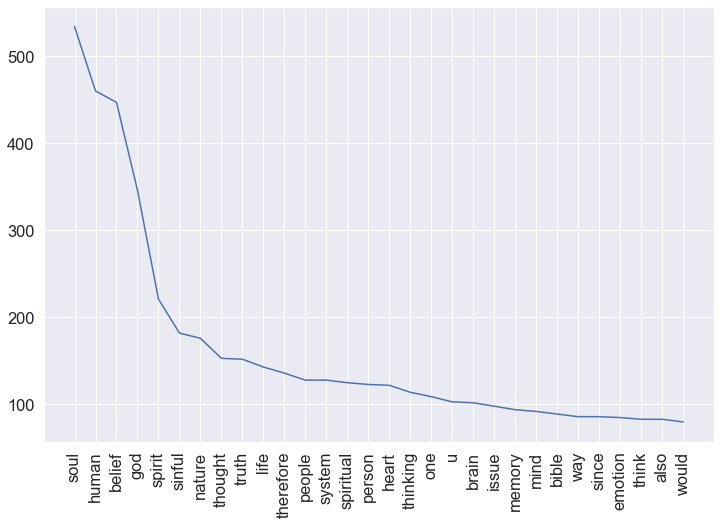

In [33]:
plt.figure(figsize=(12,8))
sns.set_theme()
sns.set(font_scale = 1.5)
sns.lineplot(data=freq_sw[:30])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [34]:
book1 = book.copy()
book1.head()

,sentences,cleaned_text,Sword_count,Cword_count
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15,7
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10,5
2,10 BRAIN vs. That much is clear.,brain v much clear,7,4
3,But we want to truly understand our inner self...,want truly understand inner self human way,18,7
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27,11


### Exploring relevant features in the data

In [35]:
stopwords = stopwords.words("english")

In [36]:
def count_stopwords(text, stopwords): #Return the number of stopwords in the text Input:- text: string , stopwords: list of string, containing the stopwords
                                      # Output:- int, number of stopwords in the text argument

    word_tokens = word_tokenize(text) #splitta i pezzi
    stopwords_x = [w for w in word_tokens if w in stopwords]
    
    return len(stopwords_x)

In [37]:
punc = string.punctuation

# Create a new variable containing the number of sentences in the summary
book1['sum_sent_count'] = book1['sentences'].apply(lambda x : len(sent_tokenize(x)))
# Create a new variable containing the number of sentences in the text
book1['clean_sent_count'] = book1['cleaned_text'].apply(lambda x : len(sent_tokenize(x)))
# Create a new variable containing the number of word in the summary
book1['sum_word_count'] = book1['sentences'].apply(lambda x : len(x.split()))
# Create a new variable containing the number of word in the text
book1['clean_word_count'] = book1['cleaned_text'].apply(lambda x : len(x.split()))
# Create a new variable containing the number of characters in the summary
book1['sum_char_count'] = book1['sentences'].apply(lambda x : len(x.replace(" ","")))
# Create a new variable containing the number of characters in the text
book1['clean_char_count'] = book1['cleaned_text'].apply(lambda x : len(x.replace(" ","")))
# Create a new variable containing the density of words in the summary
book1['sum_word_density'] = book1['sum_word_count'] / (book1['sum_char_count'] + 1)
# Create a new variable containing the density of words in the text
book1['clean_word_density'] = book1['clean_word_count'] / (book1['clean_char_count'] + 1)
# Create a new variable containing the density of sentences in the summary
book1['sum_sent_density'] = book1['sum_sent_count'] / (book1['sum_word_count'] + 1)
# Create a new variable containing the density of sentences in the text
book1['clean_sent_density'] = book1['clean_sent_count'] / (book1['clean_word_count'] + 1)
# Create a new variable containing the number of punctuations in the summary
book1['sum_punc_count'] = book1['sentences'].apply(lambda x : len([a for a in x if a in punc]))
# Create a new variable containing the number of punctuations in the text
book1['clean_punc_count'] = book1['cleaned_text'].apply(lambda x : len([a for a in x if a in punc]))

# Stopwords
# Create a new variable containing the number of stopwords in the text
book1['clean_stopw_count'] =  book1['cleaned_text'].apply(lambda x : count_stopwords(x, stopwords))
# Create a new variable containing the number of stopwords in the summary
book1['sum_stopw_count'] =  book1['sentences'].apply(lambda x : count_stopwords(x, stopwords))
# Create a new variable containing the density of stopwords in the summary
book1['sum_stopw_density'] = book1['sum_stopw_count'] / (book1['sum_word_count'] + 1)
# Create a new variable containing the density of stopwords in the text
book1['clean_stopw_density'] = book1['clean_stopw_count'] / (book1['clean_word_count'] + 1)

#Print some of the calculated values
print(book1[['sum_word_count', 'sum_char_count', 'sum_word_density', 'sum_punc_count']].head(5))
print(book1[['clean_word_count', 'clean_char_count', 'clean_word_density', 'clean_punc_count']].head(5))
print(book1[['clean_sent_count', 'sum_sent_count', 'clean_sent_density', 'sum_sent_density']].head(5))
print(book1[['clean_stopw_count', 'sum_stopw_count', 'clean_stopw_density', 'sum_stopw_density']].head(5))

   sum_word_count  sum_char_count  sum_word_density  sum_punc_count
0              15              62          0.238095               3
1              10              47          0.208333               1
2               7              26          0.259259               2
3              18              68          0.260870               2
4              27             118          0.226891               4
   clean_word_count  clean_char_count  clean_word_density  clean_punc_count
0                 7                38            0.179487                 0
1                 5                33            0.147059                 0
2                 4                15            0.250000                 0
3                 7                36            0.189189                 0
4                11                66            0.164179                 0
   clean_sent_count  sum_sent_count  clean_sent_density  sum_sent_density
0                 1               1            0.125000       

#### 2.1 Analyze the feature distributions on the Original text variable

In [38]:
# Extract the descriptive statistics for the summary variable
book1[['sum_sent_count','sum_word_count', 'sum_char_count', 'sum_sent_density', 'sum_word_density']].describe()

,sum_sent_count,sum_word_count,sum_char_count,sum_sent_density,sum_word_density
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,1.000478,18.033445,84.465839,0.073436,0.212812
std,0.021858,9.826498,46.795816,0.057065,0.030275
min,1.000000,1.000000,2.000000,0.012821,0.076923
25%,1.000000,11.000000,49.000000,0.041667,0.194444
50%,1.000000,17.000000,80.000000,0.055556,0.211180
75%,1.000000,23.000000,110.000000,0.083333,0.228571
max,2.000000,77.000000,341.000000,0.500000,0.347826


#### 2.2 Analyze the feature distributions on the Cleaned text variable

In [39]:
book1[['clean_sent_count', 'clean_word_count', 'clean_char_count', 'clean_sent_density', 'clean_word_density']].describe()

,clean_sent_count,clean_word_count,clean_char_count,clean_sent_density,clean_word_density
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.994267,8.901099,54.108935,0.134485,0.163321
std,0.075520,5.061313,32.105773,0.088472,0.027975
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,30.000000,0.076923,0.148148
50%,1.000000,8.000000,51.000000,0.111111,0.161290
75%,1.000000,12.000000,72.000000,0.166667,0.176471
max,1.000000,35.000000,241.000000,0.500000,0.333333


#### 2.3 Plotting box plots and histograms for Original text and Cleaned Text variable

In [40]:
import random

# We declare a new dataframe for plotting porpouses
#data=dataset

# Create a dictionary to title the columns based on their names
labels_dict={'sum_word_count': 'Word Count of \n Original_Text','clean_word_count': 'Word Count\n of Cleaned Text',
             'sum_char_count': 'Char Count of \n Original_Text','clean_char_count': 'Char Count\n of Cleaned Text',
             'sum_word_density': 'Word Density of \n Original_Text','clean_word_density': 'Word Density \nof Texts',
             'sum_punc_count': 'Punctuation Count of \n Original_Text','clean_punc_count': 'Punctuation Count\n of Texts',
             'clean_sent_count': 'Sentence Count\n of Cleaned Text', 'sum_sent_count': 'Sentence Count of \n Original_Text',
             'clean_sent_density': 'Sentence Density\n of Cleaned Text', 'sum_sent_density': 'Sentence Density of \n Original_Text',
             'clean_stopw_count': 'Stopwords Count\n of Cleaned Text', 'sum_stopw_count': 'Stopwords Count of \n Original_Text',
             'ADJ': 'adjective','ADP': 'adposition', 'ADV': 'adverb','CONJ': 'conjunction',
             'DET': 'determiner','NOUN': 'noun', 'clean_unknown_count': 'Unknown words in Cleaned Text',
             'sum_unknown_count': 'Unknown words in Original_Text',}

In [41]:
def plot_boxplots(data, plot_vars, labels, figsize):
    if plot_vars.ndim == 1:
        nrows=1
        ncols = plot_vars.shape[0]
    else:
        nrows= plot_vars.shape[0]
        ncols = plot_vars.shape[1]

    
    f, axes = plt.subplots(nrows, ncols, sharey=False, figsize=(15,5))
    
    for i in range(nrows):
        for j in range(ncols):
            if plot_vars[i,j]!=None:
                if axes.ndim>1:
                    axes[i,j].set_title(labels[plot_vars[i,j]])
                    axes[i,j].grid(True)
                    #Set x ticks
                    axes[i,j].tick_params(
                        axis='x',          
                        which='both',      
                        bottom=False,      
                        top=False,         
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[i,j].boxplot(data[plot_vars[i,j]])
                else:
                    #Set the title
                    axes[j].set_title(labels[plot_vars[i,j]])
                    axes[j].grid(True)
                    #Set x ticks
                    axes[j].tick_params(
                        axis='x',          
                        which='both',      
                        bottom=False,      
                        top=False,         
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[j].boxplot(data[plot_vars[i,j]])
                
            else:
                axes[i,j].set_visible(False)
    # Adjust the plots for a better visualization
    f.tight_layout()
    plt.show() 


def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def plot_histograms(data, plot_vars, xlim, labels, figsize):
    #Set some parameters
    kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2})
     #cmap = get_cmap(plot_vars.shape[1])
    # Create the figure and axes
    fig, axes = plt.subplots(plot_vars.shape[0], plot_vars.shape[1], figsize=figsize, sharey=False, dpi=100)
    
    #For every variable in plot_vars
    for i in range(plot_vars.shape[1]):
        # Plot the histogram 
        sns.set(font_scale = 1)
        sns.distplot(data[plot_vars[0,i]] , color=(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1),), 
                     ax=axes[i], axlabel=labels[plot_vars[0,i]], bins= 50, norm_hist = True)
        #For a better visualization we set the x limit
        axes[i].set_xlim(left=0, right=xlim[i])
        
    fig.tight_layout()
    plt.show()
                    

#### 2.3.1 Original Text

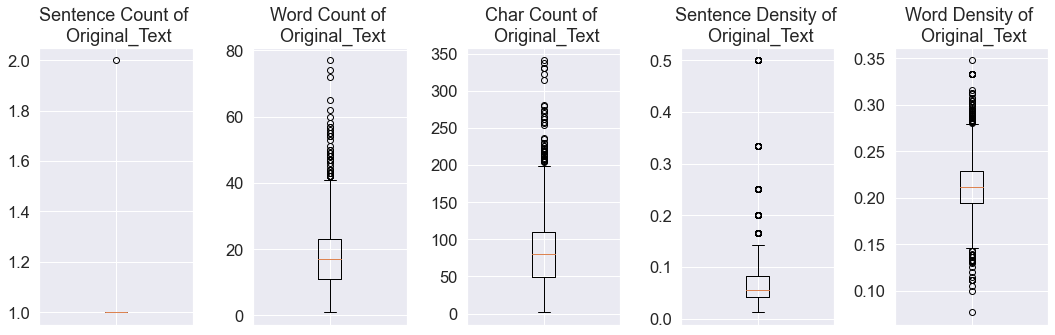

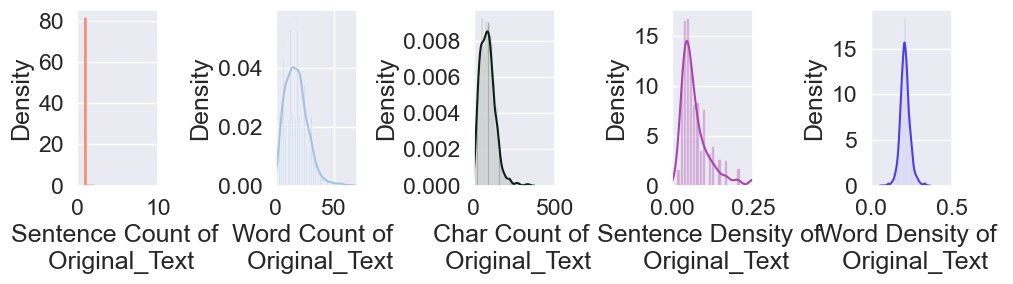

In [42]:
import numpy as np

#Set the columns to plot
plot_vars=np.array([['sum_sent_count', 'sum_word_count', 'sum_char_count','sum_sent_density','sum_word_density']])
# Plot the boxplots for the interesting columns
plot_boxplots(book1, plot_vars, labels_dict, figsize=(10,3))
# Plot the histograms 
plot_histograms(book1, plot_vars, [10, 70, 500, 0.25, 0.5], labels_dict, figsize=(10,3))

#### 2.3.2 Cleaned Text

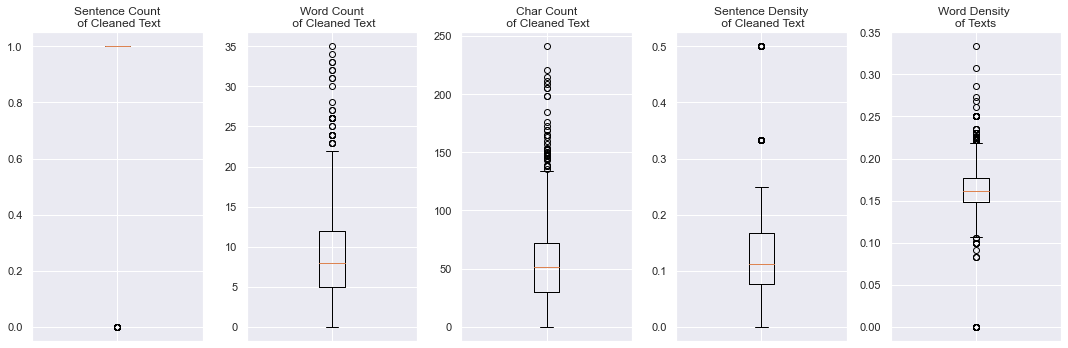

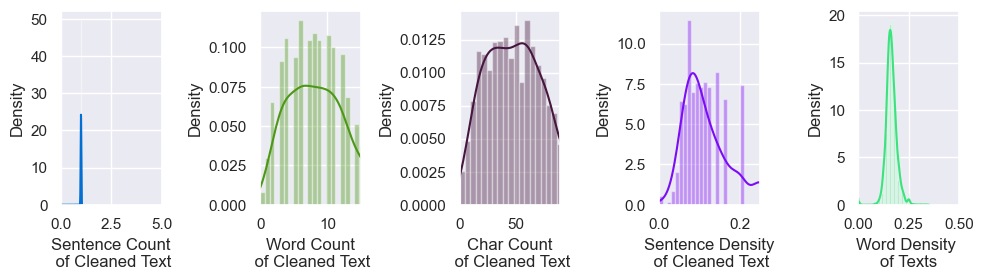

In [43]:
#Set the columns to plot
plot_vars=np.array([['clean_sent_count', 'clean_word_count', 'clean_char_count','clean_sent_density','clean_word_density']])
sns.set(font_scale = 1)
# Plot the boxplots and histograms for the interesting columns
plot_boxplots(book1, plot_vars, labels_dict, figsize=(10,3))
plot_histograms(book1, plot_vars, [5, 15, 90, 0.25, 0.5], labels_dict, figsize=(10,3))

#### 2.3.3 Count of stopwords and punctuations present in Original text and Cleaned text

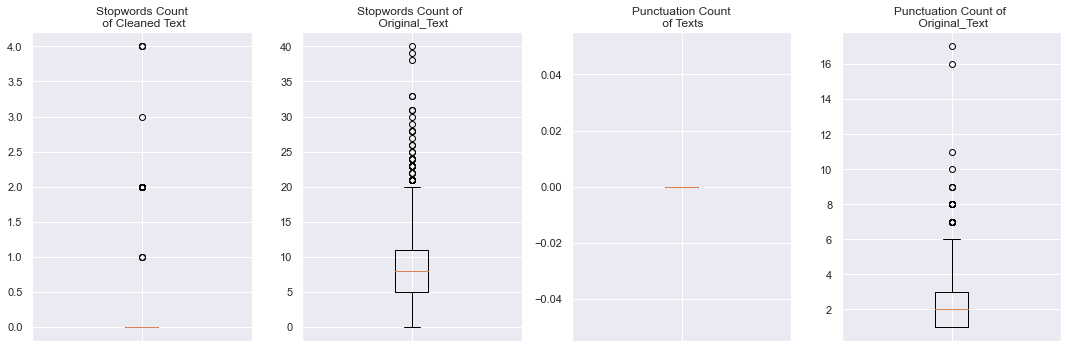

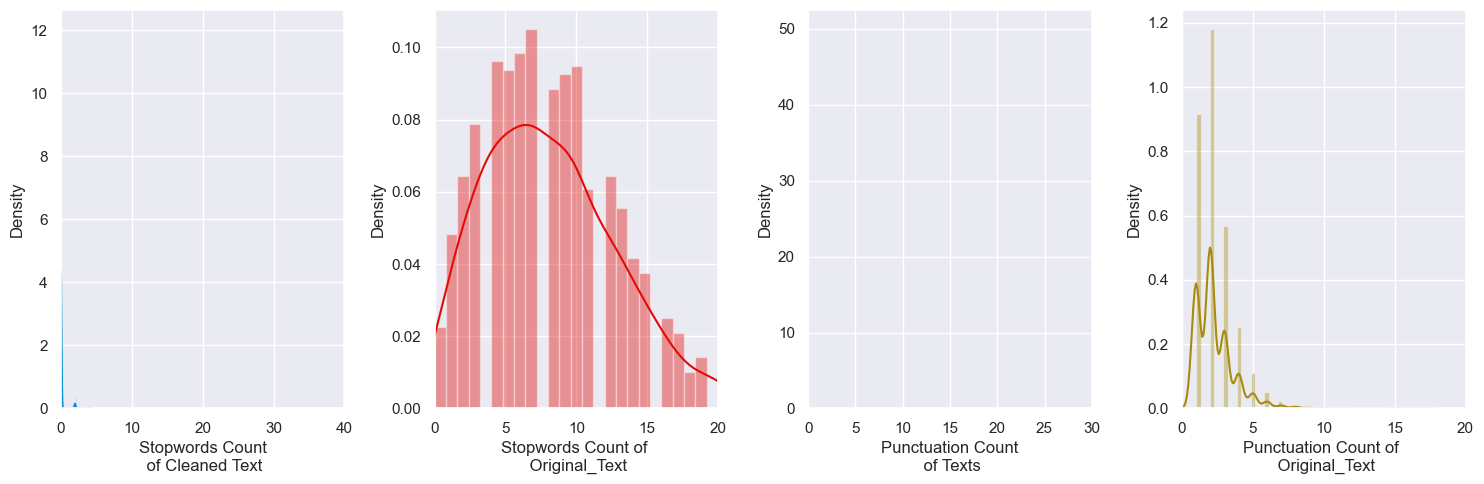

In [44]:
# Set the columns to plot, those relatives to stopwords and punctuation
plot_vars=np.array([['clean_stopw_count', 'sum_stopw_count', 'clean_punc_count','sum_punc_count']])
# Plot the bosplot and histograms
plot_boxplots(book1, plot_vars, labels_dict, figsize=(15,5))
plot_histograms(book1, plot_vars, [40, 20, 30, 20], labels_dict, figsize=(15,5))

### 3.N-gram

#### i) Bi-gram

In [45]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [46]:
top2_words = get_top_n2_words(book["cleaned_text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,sinful nature,173
1,human spirit,169
2,belief system,104
3,thought belief,68
4,core belief,37


[Text(0, 0, 'sinful nature'),
 Text(1, 0, 'human spirit'),
 Text(2, 0, 'belief system'),
 Text(3, 0, 'thought belief'),
 Text(4, 0, 'core belief'),
 Text(5, 0, 'word god'),
 Text(6, 0, 'jesus christ'),
 Text(7, 0, 'inner human'),
 Text(8, 0, 'human soul'),
 Text(9, 0, 'spiritual information'),
 Text(10, 0, 'soul human'),
 Text(11, 0, 'higher order'),
 Text(12, 0, 'thought thinking'),
 Text(13, 0, 'holy spirit'),
 Text(14, 0, 'spiritual life'),
 Text(15, 0, 'soul component'),
 Text(16, 0, 'even though'),
 Text(17, 0, 'right wrong'),
 Text(18, 0, 'control soul'),
 Text(19, 0, 'heart mind')]

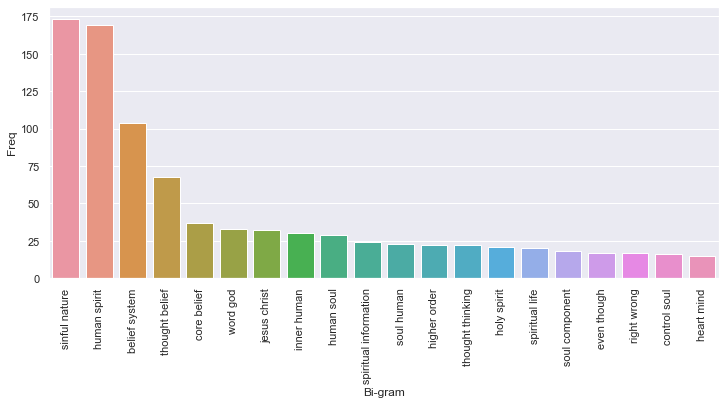

In [47]:
#Bi-gram plot

top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (12, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])

#### ii) Tri-gram

In [48]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [49]:
top3_words = get_top_n3_words(book["cleaned_text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,soul human spirit,18
1,jesus christ savior,11
2,human spirit spiritual,10
3,belief system based,10
4,higher order belief,8


[Text(0, 0, 'soul human spirit'),
 Text(1, 0, 'jesus christ savior'),
 Text(2, 0, 'human spirit spiritual'),
 Text(3, 0, 'belief system based'),
 Text(4, 0, 'higher order belief'),
 Text(5, 0, 'thought thinking belief'),
 Text(6, 0, 'human spirit filled'),
 Text(7, 0, 'inside human spirit'),
 Text(8, 0, 'human thought belief'),
 Text(9, 0, 'higher order thought'),
 Text(10, 0, 'part inner human'),
 Text(11, 0, 'sinful nature take'),
 Text(12, 0, 'human spirit must'),
 Text(13, 0, 'satan cosmic system'),
 Text(14, 0, 'therefore sinful nature'),
 Text(15, 0, 'human spirit soul'),
 Text(16, 0, 'faith jesus christ'),
 Text(17, 0, 'belief powerful thing'),
 Text(18, 0, 'one belief system'),
 Text(19, 0, 'god put place')]

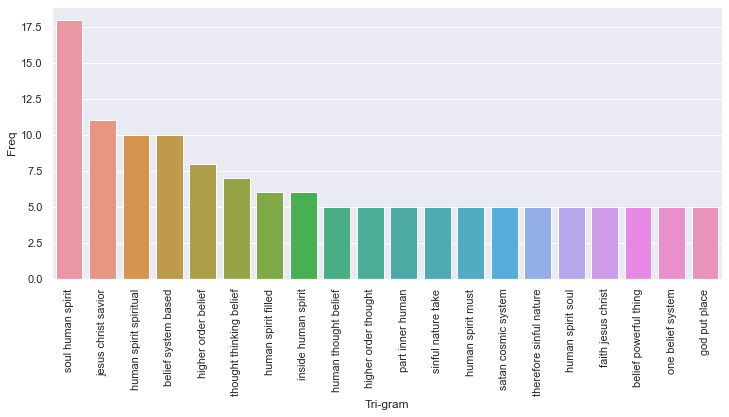

In [50]:
#Tri-gram plot

top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (12, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])

# Emotion Mining

In [51]:
afinn = pd.read_csv('E:\My folder\ExcelR(documents)\Assignments\Text Mining-11\Afinn.csv.xls', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [52]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [53]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [54]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [55]:
book['Ssentiment_value'] = book['cleaned_text'].apply(calculate_sentiment)

In [56]:
book

,sentences,cleaned_text,Sword_count,Cword_count,Ssentiment_value
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15,7,0
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10,5,1
2,10 BRAIN vs. That much is clear.,brain v much clear,7,4,1
3,But we want to truly understand our inner self...,want truly understand inner self human way,18,7,1
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27,11,-1
...,...,...,...,...,...
2088,The inner human will live forever.,inner human live forever,6,4,0
2089,Our thoughts and beliefs will determine our ha...,thought belief determine happiness earth eternity,15,6,3
2090,That makes them very powerful things.,make powerful thing,6,3,2
2091,Thoughts and beliefs have eternal implications.,thought belief eternal implication,6,4,0


In [57]:
# Maximum sentiment value
book['Ssentiment_value'].max()

15

In [58]:
# max sentiment value
book[book['Ssentiment_value']==15]

,sentences,cleaned_text,Sword_count,Cword_count,Ssentiment_value
1130,"19 Moreover, when God gives someone wealth and...",moreover god give someone wealth possession ab...,30,14,15


In [59]:
# minimum sentiment value
book['Ssentiment_value'].min()

-12

In [60]:
# min sentiment value
book[book['Ssentiment_value']==-12]

,sentences,cleaned_text,Sword_count,Cword_count,Ssentiment_value
1743,We see that evil always begins with evil thoug...,see evil always begin evil thought lead evil b...,20,12,-12


In [61]:
# Sentiment score of the whole book(Dataset)
book['Ssentiment_value'].describe()

count    2093.000000
mean        0.075012
std         2.349812
min       -12.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: Ssentiment_value, dtype: float64

<AxesSubplot:xlabel='Ssentiment_value', ylabel='Density'>

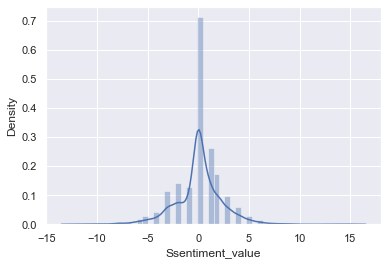

In [62]:
sns.distplot(book['Ssentiment_value'])

<AxesSubplot:xlabel='index', ylabel='Ssentiment_value'>

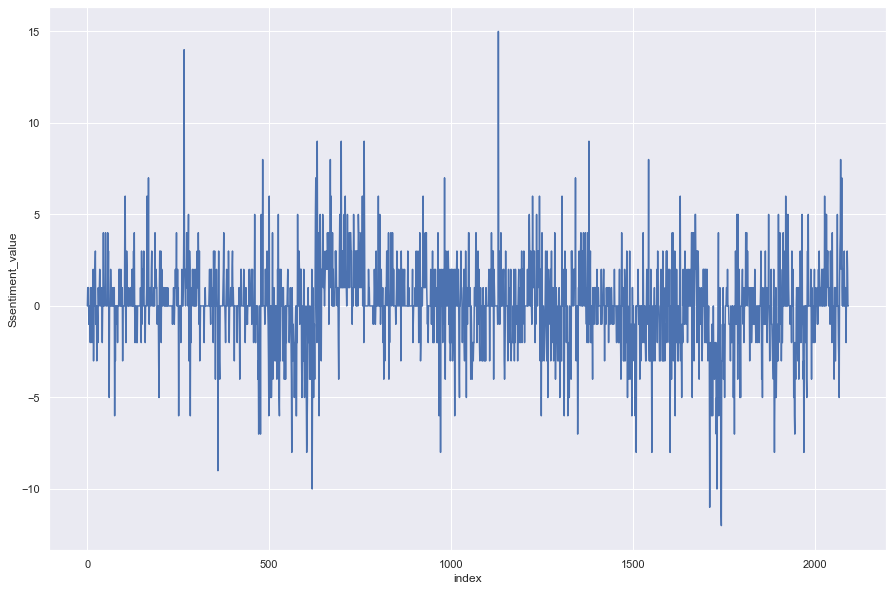

In [63]:
book['index']=range(0,len(book))
plt.figure(figsize=(15, 10))
sns.lineplot(y='Ssentiment_value',x='index',data=book)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='Sword_count', ylabel='Ssentiment_value'>

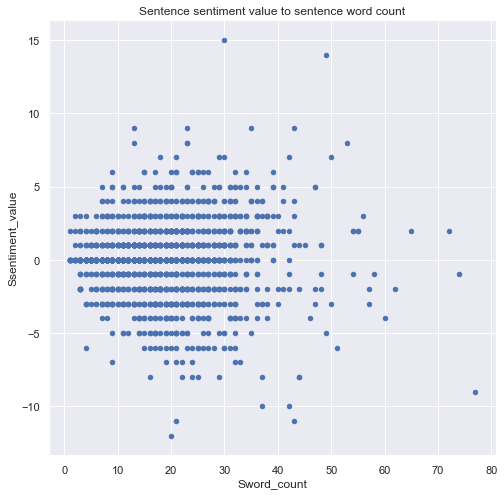

In [64]:
book.plot.scatter(x='Sword_count', y='Ssentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [65]:
# This function will return sentiment category based on values in sentiment_value column

def sent_sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['Ssentiment_value'] < 0:
        val = 'Negative'
    elif row['Ssentiment_value'] == 0: 
        val = 'Neutral'
    elif row['Ssentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [66]:
#Applying the function in our new column
book['Ssentiment_category'] = book.apply(sent_sentiment_cat, axis=1)
book.head()

,sentences,cleaned_text,Sword_count,Cword_count,Ssentiment_value,index,Ssentiment_category
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15,7,0,0,Neutral
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10,5,1,1,Positive
2,10 BRAIN vs. That much is clear.,brain v much clear,7,4,1,2,Positive
3,But we want to truly understand our inner self...,want truly understand inner self human way,18,7,1,3,Positive
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27,11,-1,4,Negative


In [152]:
del book['index']
book.head()

,sentences,cleaned_text,Sword_count,Cword_count,Ssentiment_value,Ssentiment_category
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15,7,0,Neutral
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10,5,1,Positive
2,10 BRAIN vs. That much is clear.,brain v much clear,7,4,1,Positive
3,But we want to truly understand our inner self...,want truly understand inner self human way,18,7,1,Positive
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27,11,-1,Negative


In [67]:
book['Ssentiment_category'].value_counts()

Neutral     805
Positive    730
Negative    558
Name: Ssentiment_category, dtype: int64

<AxesSubplot:xlabel='Ssentiment_category', ylabel='count'>

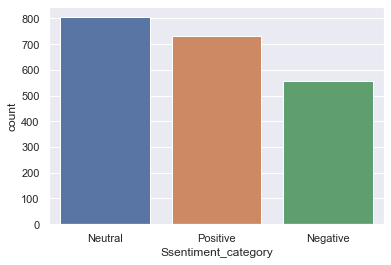

In [68]:
sns.countplot(x = 'Ssentiment_category', data = book)

# WordCloud

### i) WordCloud for Cleaned text

In [69]:
string_Total = " ".join(book["cleaned_text"])

In [70]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

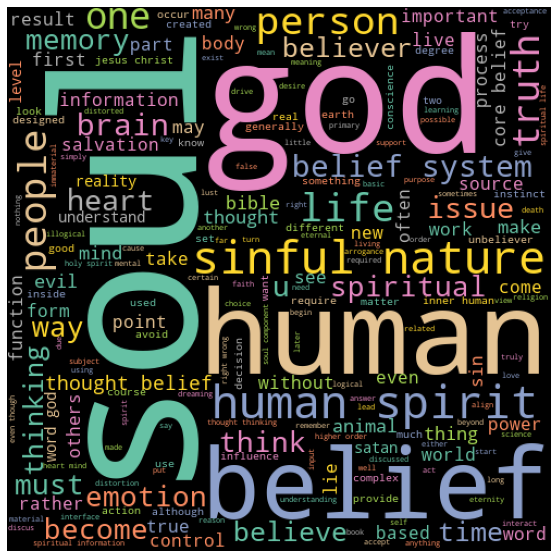

In [71]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black', width = 500, height = 500,colormap='Set2').generate(string_Total)
plot_cloud(wordcloud_stw)

### ii) WordCloud of Original Text

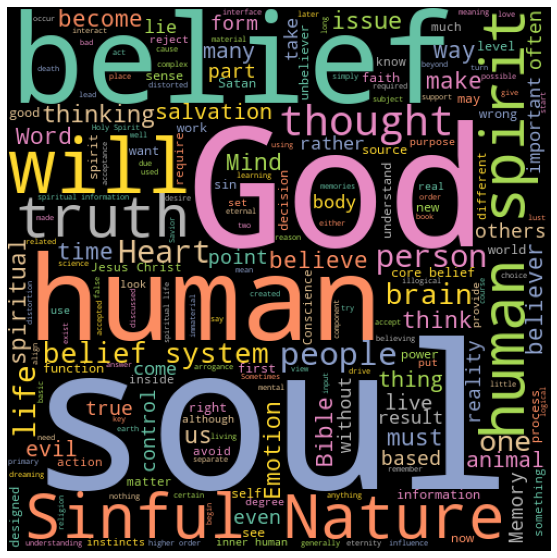

In [72]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black', width = 500, height = 500,colormap='Set2').generate(" ".join(book["sentences"]))
plot_cloud(wordcloud_stw)

# Model Building

In [73]:
book.head()

,sentences,cleaned_text,Sword_count,Cword_count,Ssentiment_value,index,Ssentiment_category
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,15,7,0,0,Neutral
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,10,5,1,1,Positive
2,10 BRAIN vs. That much is clear.,brain v much clear,7,4,1,2,Positive
3,But we want to truly understand our inner self...,want truly understand inner self human way,18,7,1,3,Positive
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,27,11,-1,4,Negative


In [74]:
book2 = book[['sentences','cleaned_text','Ssentiment_category']]
book2.head()

,sentences,cleaned_text,Ssentiment_category
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,Neutral
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,Positive
2,10 BRAIN vs. That much is clear.,brain v much clear,Positive
3,But we want to truly understand our inner self...,want truly understand inner self human way,Positive
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,Negative


In [75]:
book2['word_list']= [word_tokenize(entry) for entry in book2['cleaned_text']]

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

book2.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [2503178280.py:1]


,sentences,cleaned_text,Ssentiment_category,word_list
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,Neutral,"[book, whole, part, must, used, commercial, pu..."
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,Positive,"[free, sharing, book, entirety, authorized]"
2,10 BRAIN vs. That much is clear.,brain v much clear,Positive,"[brain, v, much, clear]"
3,But we want to truly understand our inner self...,want truly understand inner self human way,Positive,"[want, truly, understand, inner, self, human, ..."
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,Negative,"[difficult, one, sure, book, casual, treatment..."


In [76]:
from nltk.corpus import stopwords

In [77]:
for index,entry in enumerate(book2['word_list']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    book2.loc[index,'new_word_list'] = str(Final_words)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [indexing.py:1684]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [indexing.py:1817]


In [78]:
book2.head()

,sentences,cleaned_text,Ssentiment_category,word_list,new_word_list
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,Neutral,"[book, whole, part, must, used, commercial, pu...","['book', 'whole', 'part', 'must', 'use', 'comm..."
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,Positive,"[free, sharing, book, entirety, authorized]","['free', 'share', 'book', 'entirety', 'authori..."
2,10 BRAIN vs. That much is clear.,brain v much clear,Positive,"[brain, v, much, clear]","['brain', 'v', 'much', 'clear']"
3,But we want to truly understand our inner self...,want truly understand inner self human way,Positive,"[want, truly, understand, inner, self, human, ...","['want', 'truly', 'understand', 'inner', 'self..."
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,Negative,"[difficult, one, sure, book, casual, treatment...","['difficult', 'one', 'sure', 'book', 'casual',..."


In [79]:
book2

,sentences,cleaned_text,Ssentiment_category,word_list,new_word_list
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,Neutral,"[book, whole, part, must, used, commercial, pu...","['book', 'whole', 'part', 'must', 'use', 'comm..."
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,Positive,"[free, sharing, book, entirety, authorized]","['free', 'share', 'book', 'entirety', 'authori..."
2,10 BRAIN vs. That much is clear.,brain v much clear,Positive,"[brain, v, much, clear]","['brain', 'v', 'much', 'clear']"
3,But we want to truly understand our inner self...,want truly understand inner self human way,Positive,"[want, truly, understand, inner, self, human, ...","['want', 'truly', 'understand', 'inner', 'self..."
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,Negative,"[difficult, one, sure, book, casual, treatment...","['difficult', 'one', 'sure', 'book', 'casual',..."
...,...,...,...,...,...
2088,The inner human will live forever.,inner human live forever,Neutral,"[inner, human, live, forever]","['inner', 'human', 'live', 'forever']"
2089,Our thoughts and beliefs will determine our ha...,thought belief determine happiness earth eternity,Positive,"[thought, belief, determine, happiness, earth,...","['thought', 'belief', 'determine', 'happiness'..."
2090,That makes them very powerful things.,make powerful thing,Positive,"[make, powerful, thing]","['make', 'powerful', 'thing']"
2091,Thoughts and beliefs have eternal implications.,thought belief eternal implication,Neutral,"[thought, belief, eternal, implication]","['thought', 'belief', 'eternal', 'implication']"


In [80]:
book2['polarity'] = book2['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
book2.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [1451722414.py:1]


,sentences,cleaned_text,Ssentiment_category,word_list,new_word_list,polarity
0,"This book, in whole or in part, must not be us...",book whole part must used commercial purpose,Neutral,"[book, whole, part, must, used, commercial, pu...","['book', 'whole', 'part', 'must', 'use', 'comm...",0.100000
1,Free sharing of this book in its entirety is a...,free sharing book entirety authorized,Positive,"[free, sharing, book, entirety, authorized]","['free', 'share', 'book', 'entirety', 'authori...",0.400000
2,10 BRAIN vs. That much is clear.,brain v much clear,Positive,"[brain, v, much, clear]","['brain', 'v', 'much', 'clear']",0.100000
3,But we want to truly understand our inner self...,want truly understand inner self human way,Positive,"[want, truly, understand, inner, self, human, ...","['want', 'truly', 'understand', 'inner', 'self...",0.000000
4,"They are difficult ones, to be sure, and this ...",difficult one sure book casual treatment subje...,Negative,"[difficult, one, sure, book, casual, treatment...","['difficult', 'one', 'sure', 'book', 'casual',...",-0.093333


In [81]:
book3=book2[['cleaned_text','Ssentiment_category']]
book3

,cleaned_text,Ssentiment_category
0,book whole part must used commercial purpose,Neutral
1,free sharing book entirety authorized,Positive
2,brain v much clear,Positive
3,want truly understand inner self human way,Positive
4,difficult one sure book casual treatment subje...,Negative
...,...,...
2088,inner human live forever,Neutral
2089,thought belief determine happiness earth eternity,Positive
2090,make powerful thing,Positive
2091,thought belief eternal implication,Neutral


In [82]:
book3['Ssentiment_category'].value_counts()

Neutral     805
Positive    730
Negative    558
Name: Ssentiment_category, dtype: int64

In [83]:
vectorizer = TfidfVectorizer()
array = vectorizer.fit_transform(book3['cleaned_text'].values.astype('U')).toarray()

In [84]:
text_df = pd.DataFrame(array,columns= vectorizer.get_feature_names())
text_df

,abdicate,abduction,ability,able,abnormal,abnormality,abnormally,abound,absolute,abstain,...,writing,written,wrong,yacht,year,yet,yield,young,zero,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
text_df['Ssentiment_category'] =  book3['Ssentiment_category']
text_df

,abdicate,abduction,ability,able,abnormal,abnormality,abnormally,abound,absolute,abstain,...,written,wrong,yacht,year,yet,yield,young,zero,zombie,Ssentiment_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [86]:
text_df.columns

Index(['abdicate', 'abduction', 'ability', 'able', 'abnormal', 'abnormality',
       'abnormally', 'abound', 'absolute', 'abstain',
       ...
       'written', 'wrong', 'yacht', 'year', 'yet', 'yield', 'young', 'zero',
       'zombie', 'Ssentiment_category'],
      dtype='object', length=3056)

In [87]:
text_df.shape

(2093, 3056)

In [88]:
text_df=text_df.drop_duplicates()
text_df

,abdicate,abduction,ability,able,abnormal,abnormality,abnormally,abound,absolute,abstain,...,written,wrong,yacht,year,yet,yield,young,zero,zombie,Ssentiment_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [89]:
text_df.shape

(2066, 3056)

In [90]:
text_df

,abdicate,abduction,ability,able,abnormal,abnormality,abnormally,abound,absolute,abstain,...,written,wrong,yacht,year,yet,yield,young,zero,zombie,Ssentiment_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [91]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
text_df['Ssentiment_category'] = encode.fit_transform(text_df['Ssentiment_category'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [702543654.py:3]


In [92]:
text_df

,abdicate,abduction,ability,able,abnormal,abnormality,abnormally,abound,absolute,abstain,...,written,wrong,yacht,year,yet,yield,young,zero,zombie,Ssentiment_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [93]:
text_df.to_csv('ThoughtsandBelief.csv')

In [94]:
X = text_df.drop(['Ssentiment_category'],axis = 1)
y = text_df['Ssentiment_category']

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## 1) Naive Bayes

### i) Actual

In [96]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score = ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score =  64.6774193548387


In [97]:
accuracyN1 = accuracy_score(y_test,predictions_NB)
precisionN1 = precision_score(y_test, predictions_NB,average='macro')
recallN1 = recall_score(y_test, predictions_NB,average='macro')
f1_scoreN1 = f1_score(y_test, predictions_NB,average='macro')

In [98]:
X_train.shape

(1446, 3055)

In [99]:
print(classification_report(y_test, predictions_NB))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57       171
           1       0.56      0.75      0.64       220
           2       0.70      0.69      0.70       229

    accuracy                           0.65       620
   macro avg       0.69      0.63      0.64       620
weighted avg       0.68      0.65      0.64       620



### ii) SMOTE

In [100]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics.pairwise import euclidean_distances

In [101]:
smote_balance = SMOTE(k_neighbors = 10, sampling_strategy='not majority',random_state= 42)
X_smote, y_smote = smote_balance.fit_resample(X,y)
print(y_smote.value_counts())
# y_bal.value_counts().plot.pie(autopct = '%0.2f%%')
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=42)

1    783
2    783
0    783
Name: Ssentiment_category, dtype: int64


In [102]:
NB_smote = naive_bayes.MultinomialNB()
NB_smote_model = NB_smote.fit(X_train_smote,y_train_smote)
predictions_NB1 = NB_smote.predict(X_test)
print("Naive Bayes Accuracy Score = ",accuracy_score(predictions_NB1, y_test)*100)

Naive Bayes Accuracy Score =  81.7741935483871


In [103]:
accuracyN2 = accuracy_score(y_test,predictions_NB1)
precisionN2 = precision_score(y_test, predictions_NB1,average='macro')
recallN2 = recall_score(y_test, predictions_NB1,average='macro')
f1_scoreN2 = f1_score(y_test, predictions_NB1,average='macro')

In [104]:
print(classification_report(y_test, predictions_NB1))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       171
           1       0.82      0.75      0.78       220
           2       0.83      0.85      0.84       229

    accuracy                           0.82       620
   macro avg       0.82      0.82      0.82       620
weighted avg       0.82      0.82      0.82       620



## 2) SVM

### i) Actual

In [105]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score = ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score =  70.0


In [106]:
accuracySVM1 = accuracy_score(y_test,predictions_SVM)
precisionSVM1 = precision_score(y_test, predictions_SVM,average='macro')
recallSVM1 = recall_score(y_test, predictions_SVM,average='macro')
f1_scoreSVM1 = f1_score(y_test, predictions_SVM,average='macro')

In [107]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       171
           1       0.58      0.84      0.69       220
           2       0.81      0.66      0.73       229

    accuracy                           0.70       620
   macro avg       0.75      0.69      0.70       620
weighted avg       0.74      0.70      0.70       620



### ii) SMOTE

In [108]:
SVC_smote = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVC_smote_model = SVC_smote.fit(X_train_smote,y_train_smote)
predictions_SVM2 = SVC_smote.predict(X_test)

In [109]:
accuracySVM2 = accuracy_score(y_test,predictions_SVM2)
precisionSVM2 = precision_score(y_test, predictions_SVM2,average='macro')
recallSVM2 = recall_score(y_test, predictions_SVM2,average='macro')
f1_scoreSVM2 = f1_score(y_test, predictions_SVM2,average='macro')

In [110]:
print(classification_report(y_test,predictions_SVM2))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       171
           1       0.79      0.93      0.85       220
           2       0.95      0.83      0.89       229

    accuracy                           0.88       620
   macro avg       0.90      0.88      0.88       620
weighted avg       0.89      0.88      0.88       620



## 3) Random Forest Classifier

### i) Actual

In [111]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
model = Rfc.fit(X_train,y_train)

In [112]:
Y_pred_rfc = Rfc.predict(X_test)

In [113]:
accuracyRFC = accuracy_score(y_test,Y_pred_rfc)
precisionRFC = precision_score(y_test, Y_pred_rfc,average='macro')
recallRFC = recall_score(y_test, Y_pred_rfc,average='macro')
f1_scoreRFC = f1_score(y_test, Y_pred_rfc,average='macro')

In [114]:
print(classification_report(y_test, Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65       171
           1       0.59      0.90      0.71       220
           2       0.81      0.67      0.73       229

    accuracy                           0.71       620
   macro avg       0.77      0.69      0.70       620
weighted avg       0.76      0.71      0.70       620



### ii) SMOTE

In [115]:
RF_smote = RandomForestClassifier()
RF_smote_model = RF_smote.fit(X_train_smote,y_train_smote)
Y_pred_RF_smote = RF_smote.predict(X_test)

In [116]:
accuracyRFC1 = accuracy_score(y_test,Y_pred_RF_smote)
precisionRFC1 = precision_score(y_test, Y_pred_RF_smote,average='macro')
recallRFC1 = recall_score(y_test, Y_pred_RF_smote,average='macro')
f1_scoreRFC1 = f1_score(y_test, Y_pred_RF_smote,average='macro')

In [117]:
print(classification_report(y_test,Y_pred_RF_smote))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       171
           1       0.84      0.98      0.91       220
           2       0.96      0.89      0.92       229

    accuracy                           0.92       620
   macro avg       0.93      0.91      0.92       620
weighted avg       0.92      0.92      0.92       620



## 4) Decision Tree Classifier

### i) Actual 

In [118]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train_smote,y_train_smote)
Y_pred = DT.predict(X_test)

In [119]:
accuracyDT1 = accuracy_score(y_test,Y_pred)
precisionDT1 = precision_score(y_test, Y_pred,average='macro')
recallDT1 = recall_score(y_test, Y_pred,average='macro')
f1_scoreDT1 = f1_score(y_test, Y_pred,average='macro')

In [120]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       171
           1       0.87      0.95      0.90       220
           2       0.94      0.91      0.92       229

    accuracy                           0.91       620
   macro avg       0.92      0.91      0.91       620
weighted avg       0.92      0.91      0.91       620



### ii) SMOTE

In [121]:
DT_smote = DecisionTreeClassifier()
DT_smote_model = DT_smote.fit(X_train_smote,y_train_smote)
Y_pred = DT_smote.predict(X_test)

In [122]:
accuracyDT2 = accuracy_score(y_test,Y_pred)
precisionDT2 = precision_score(y_test, Y_pred,average='macro')
recallDT2 = recall_score(y_test, Y_pred,average='macro')
f1_scoreDT2 = f1_score(y_test, Y_pred,average='macro')

In [123]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       171
           1       0.89      0.94      0.91       220
           2       0.94      0.91      0.92       229

    accuracy                           0.92       620
   macro avg       0.92      0.91      0.92       620
weighted avg       0.92      0.92      0.92       620



## 5) Logistic Regression

### i) SMOTE

In [124]:
from sklearn.linear_model import LogisticRegression
log_reg_smote = LogisticRegression()
log_reg_model_smote = log_reg_smote.fit(X_train_smote,y_train_smote)
Y_pred = log_reg_smote.predict(X_test)

In [125]:
accuracyLG2 = accuracy_score(y_test,Y_pred)
precisionLG2 = precision_score(y_test, Y_pred,average='macro')
recallLG2 = recall_score(y_test, Y_pred,average='macro')
f1_scoreLG2 = f1_score(y_test, Y_pred,average='macro')

In [126]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       171
           1       0.80      0.89      0.84       220
           2       0.93      0.84      0.88       229

    accuracy                           0.87       620
   macro avg       0.87      0.87      0.87       620
weighted avg       0.87      0.87      0.87       620



### ii) Actual

In [127]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model = lg.fit(X_train,y_train)
Y_pred = lg.predict(X_test)

In [128]:
accuracyLG1 = accuracy_score(y_test,Y_pred)
precisionLG1 = precision_score(y_test, Y_pred,average='macro')
recallLG1 = recall_score(y_test, Y_pred,average='macro')
f1_scoreLG1 = f1_score(y_test, Y_pred,average='macro')

In [129]:
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65       171
           1       0.58      0.84      0.69       220
           2       0.79      0.65      0.71       229

    accuracy                           0.69       620
   macro avg       0.73      0.68      0.68       620
weighted avg       0.72      0.69      0.69       620

[[ 92  61  18]
 [ 14 185  21]
 [  7  73 149]]


## 6) KNN

### i) Actual

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [131]:
knn = KNeighborsClassifier(n_neighbors = 3)
model = knn.fit(X_train,y_train)

In [132]:
Y_pred = model.predict(X_test)

In [133]:
accuracyKNN1 = accuracy_score(y_test,Y_pred)
precisionKNN1 = precision_score(y_test, Y_pred,average='macro')
recallKNN1 = recall_score(y_test, Y_pred,average='macro')
f1_scoreKNN1 = f1_score(y_test, Y_pred,average='macro')

In [134]:
print(classification_report(y_test, Y_pred))
print(confusion_matrix(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.43      0.52       171
           1       0.45      0.80      0.58       220
           2       0.78      0.39      0.52       229

    accuracy                           0.55       620
   macro avg       0.62      0.54      0.54       620
weighted avg       0.62      0.55      0.54       620

[[ 74  91   6]
 [ 25 176  19]
 [ 17 123  89]]


### ii) SMOTE

In [135]:
knn_smote = KNeighborsClassifier(n_neighbors = 3)
knn_model_smote = knn_smote.fit(X_train_smote,y_train_smote)
Y_pred = knn_smote.predict(X_test)

In [136]:
accuracyKNN2 = accuracy_score(y_test,Y_pred)
precisionKNN2 = precision_score(y_test, Y_pred,average='macro')
recallKNN2 = recall_score(y_test, Y_pred,average='macro')
f1_scoreKNN2 = f1_score(y_test, Y_pred,average='macro')

In [137]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.97      0.68       171
           1       0.87      0.49      0.62       220
           2       0.85      0.66      0.75       229

    accuracy                           0.69       620
   macro avg       0.75      0.71      0.68       620
weighted avg       0.77      0.69      0.68       620



## Model Comparison in Tabular Formate

In [138]:
compare_models = pd.DataFrame(
    {  'Model' : ['Naive Bayes(Actual)', 'Naive Bayes(SMOTE)','SVM(Actual)','SVM(SMOTE)','Random Forest classifier(Actual)',
                  'Random Forest classifier(SMOTE)', 'Decision Tree Classifier(Actual)','Decision Tree Classifier(SMOTE)',
                  'Logistic Regression(Actual)','Logistic Regression(SMOTE)','KNN(Actual)','KNN(SMOTE)'],
       'Accuracy' : [accuracyN1, accuracyN2, accuracySVM1, accuracySVM2, accuracyRFC, accuracyRFC1, accuracyDT1, accuracyDT2, 
                     accuracyLG1, accuracyLG2, accuracyKNN1, accuracyKNN2],
        'Precision'  : [precisionN1, precisionN2, precisionSVM1, precisionSVM2, precisionRFC, precisionRFC1, precisionDT1, 
                        precisionDT2, precisionLG1, precisionLG2, precisionKNN1, precisionKNN2],
        'Recall'  : [recallN1, recallN2, recallSVM1, recallSVM2, recallRFC, recallRFC1, recallDT1, recallDT2, recallLG1, 
                     recallLG2, recallKNN1, recallKNN2],
        'F1-score' : [f1_scoreN1, f1_scoreN2, f1_scoreSVM1, f1_scoreSVM2, f1_scoreRFC, f1_scoreRFC1, f1_scoreDT1, 
                      f1_scoreDT2, f1_scoreLG1, f1_scoreLG2, f1_scoreKNN1, f1_scoreKNN2] 
    })
  
print(compare_models)

                               Model  Accuracy  Precision    Recall  F1-score
0                Naive Bayes(Actual)  0.646774   0.685430  0.631104  0.636479
1                 Naive Bayes(SMOTE)  0.817742   0.817078  0.821320  0.818247
2                        SVM(Actual)  0.700000   0.745306  0.691567  0.700010
3                         SVM(SMOTE)  0.880645   0.895466  0.881024  0.884445
4   Random Forest classifier(Actual)  0.706452   0.767261  0.692298  0.698860
5    Random Forest classifier(SMOTE)  0.916129   0.927605  0.913209  0.916996
6   Decision Tree Classifier(Actual)  0.912903   0.917657  0.910315  0.912866
7    Decision Tree Classifier(SMOTE)  0.916129   0.917541  0.914648  0.915672
8        Logistic Regression(Actual)  0.687097   0.728883  0.676525  0.682991
9         Logistic Regression(SMOTE)  0.867742   0.873367  0.868350  0.869321
10                       KNN(Actual)  0.546774   0.623305  0.540465  0.537226
11                        KNN(SMOTE)  0.685484   0.748076  0.706

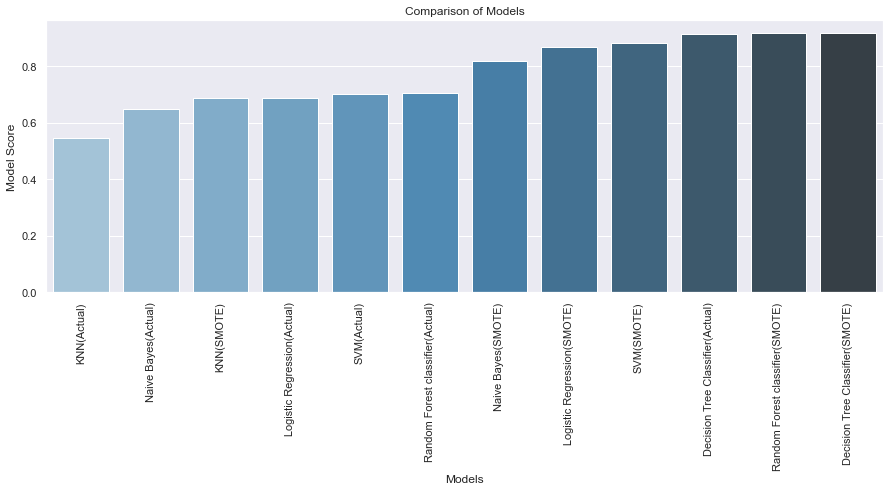

In [139]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Model',y='Accuracy', data=compare_models, palette=("Blues_d"), order=compare_models.sort_values('Accuracy').Model)
plt.xlabel('Models')
plt.ylabel("Model Score")
plt.title('Comparison of Models')
plt.xticks(rotation=90)
plt.show()

# Testing

In [140]:
Y_pred_RF_smote

array([0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2,

In [141]:
# 2nd Method
from collections import Counter
c = Counter(Y_pred_RF_smote)
print(c.most_common(1))

[(1, 257)]


In [142]:
type(Y_pred_RF_smote)

numpy.ndarray

In [143]:
import statistics
from statistics import mode
a = Y_pred_RF_smote.tolist()
type(a)
mode(a)

1

## Final Result

In [144]:
if mode(a)==0:
    print("Negative Sentiment")
elif mode(a)==1:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")
    

Neutral Sentiment


## Final Result - Graphical Representation

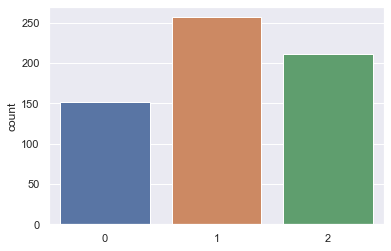

In [145]:
sns.countplot(x=a ,data = text_df)
plt.show()

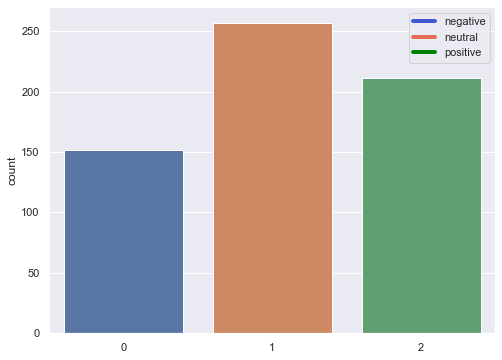

In [146]:
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color=cmap(0.03), lw=4),
                Line2D([0], [0], color=cmap(.85), lw=4),
                Line2D([0], [0], color='green', lw=4)]

#plt.figure(figsize = (8,6))
fig, ax = plt.subplots(figsize = (8,6))
lines = sns.countplot(x=a , data =text_df)
ax.legend(custom_lines, ['negative', 'neutral', 'positive'])

## Pie- chart

In [147]:
text_df.Ssentiment_category.value_counts(0)

1    783
2    728
0    555
Name: Ssentiment_category, dtype: int64

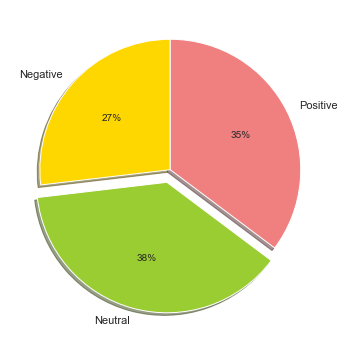

In [148]:
import matplotlib.pyplot as plt
a =text_df['Ssentiment_category'].value_counts()[0]     #......0 =555
b =text_df['Ssentiment_category'].value_counts()[1]     #......1 =783
c =text_df['Ssentiment_category'].value_counts()[2]     #......2 =728

fig1, ax1 = plt.subplots(figsize=(8, 6))
label = ['Negative', 'Neutral', 'Positive']
count = [a, b, c]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0.1, 0)  # explode 2nd slice
plt.pie(count, labels=label, autopct='%0.f%%', explode=explode, colors=colors,shadow=True, startangle=90)
plt.show()